Ahmed Baari  
126156004  
Semester 6

## EDA On Image Dataset

We are going to use the oxford flowers dataset for this

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import tensorflow_datasets as tfds


We get dataset, and info about the dataset when loading when `with_info` is `TRUE`.   

Also, when `as_supervised` is `TRUE`, we get the train and test as a tuple instead of a dictionary.


In [17]:
(ds_train, ds_test), ds_info = tfds.load(
    'oxford_flowers102',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

I'm converting this to a Pandas DataFrame because I am very familiar with its methods.  

However, the disadvantage is that all images are loaded in RAM.

In [21]:
train_df = tfds.as_dataframe(ds_train, ds_info)


In [23]:
train_df.head()

,image,label
0,"[[[1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], ...",72
1,"[[[61, 65, 51], [65, 69, 55], [69, 71, 57], [6...",84
2,"[[[110, 127, 183], [113, 130, 182], [121, 138,...",70
3,"[[[50, 88, 37], [51, 89, 38], [54, 90, 42], [5...",51
4,"[[[151, 142, 145], [152, 143, 146], [155, 146,...",48


Seeing the distribution of each type of flower

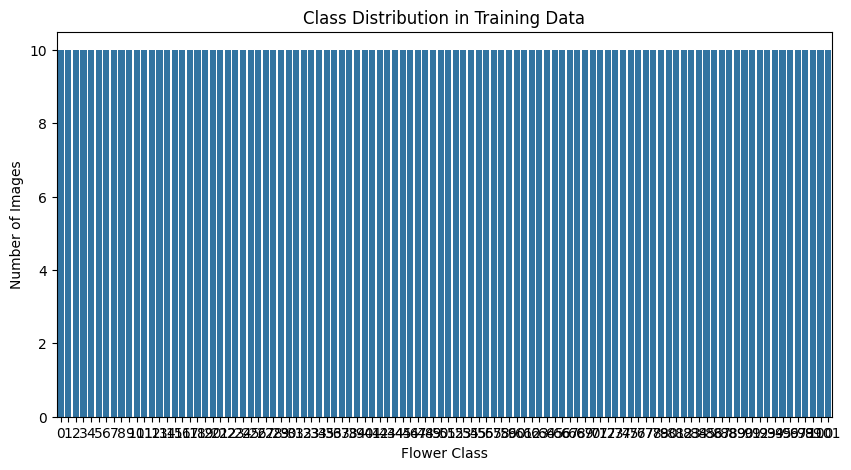

In [24]:
# 1. Class Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=train_df)
plt.title('Class Distribution in Training Data')
plt.xlabel('Flower Class')
plt.ylabel('Number of Images')
plt.show()

Next, lets see the shapes of all the images

In [25]:
# 2. Image Shape Analysis
image_shapes = train_df['image'].apply(lambda img: img.shape).value_counts()
print("Unique Image Shapes:\n", image_shapes)

Unique Image Shapes:
 image
(500, 667, 3)    163
(500, 752, 3)     84
(500, 666, 3)     51
(667, 500, 3)     33
(500, 750, 3)     30
                ... 
(726, 500, 3)      1
(618, 500, 3)      1
(500, 509, 3)      1
(500, 568, 3)      1
(555, 500, 3)      1
Name: count, Length: 363, dtype: int64


Finally, printing some sample images

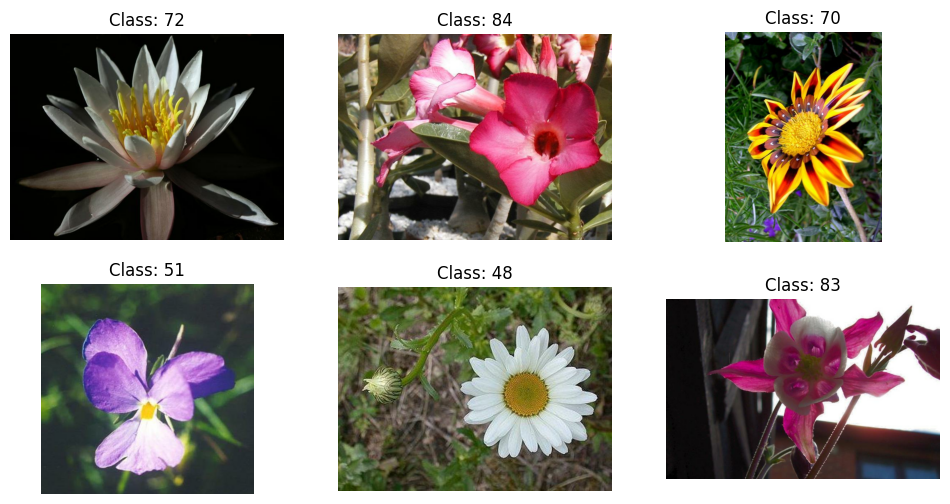

In [27]:
# 3. Display Sample Images
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_df['image'][i].astype("uint8"))  # Convert to NumPy array for display
    plt.title(f"Class: {train_df['label'][i]}")
    plt.axis('off')
plt.show()



---

# EDA QUESTIONS


## 1. How many classes (flower types) are present in the dataset?

In [30]:
train_df['label'].unique()

array([ 72,  84,  70,  51,  48,  83,  42,  58,  40,  35,  60,  59,  95,
        87,  23,  91,  75,  79,  24,  20,  64,  89, 100,  62,  16,   2,
        41,  26,  45,  67,   1,  61,  54,  39,   7,  12,  29,  11,  43,
        98,  63,  15,  55,  38,  36,  78,   3,  30,  57,  73,  25,   5,
        53,  90,   0,  92,   9,  68,   8,  28,  50,  22,  96,  31,  47,
        69,  34,  52,  21,  81,  49,  46,  65,  94,  32,  56,  77,   6,
        86,  88,  33,  71,  27,  93,  99,  17,  80,  18,  66,  14, 101,
        44,  74,   4,  85,  82,  10,  13,  37,  76,  19,  97])

In [33]:
len(train_df['label'].unique())

102

## 2. What is the distribution of images across the classes?

In [35]:
train_df['label'].value_counts()

,count
label,
72,10
47,10
32,10
94,10
65,10
...,...
61,10
1,10
67,10


Text(0, 0.5, 'Number of Images')

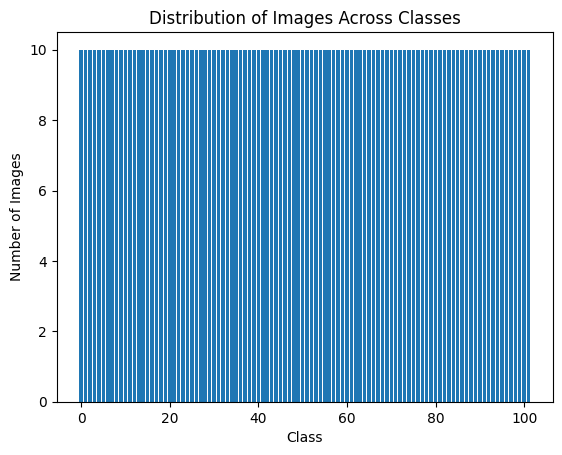

In [34]:
plt.bar(train_df['label'].unique(), train_df['label'].value_counts())

plt.title('Distribution of Images Across Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')

## 3. Are the classes balanced??

In [ ]:
# yes

## 4. What is the total number of images in the dataset?

In [36]:
len(train_df)

1020

## 5. What are the dimensions (width, height) of the images in the dataset? Are they uniform or varied?

In [38]:
# Add shape column
train_df['shape'] = train_df['image'].apply(lambda img: img.shape)

In [39]:
train_df['shape'].unique()

array([(500, 667, 3), (500, 666, 3), (670, 500, 3), (500, 505, 3),
       (500, 672, 3), (500, 761, 3), (667, 500, 3), (617, 500, 3),
       (500, 664, 3), (750, 500, 3), (500, 752, 3), (501, 667, 3),
       (693, 500, 3), (545, 501, 3), (500, 581, 3), (500, 516, 3),
       (500, 780, 3), (701, 500, 3), (500, 657, 3), (500, 539, 3),
       (500, 626, 3), (500, 649, 3), (500, 550, 3), (627, 500, 3),
       (547, 500, 3), (500, 530, 3), (544, 500, 3), (597, 500, 3),
       (500, 750, 3), (500, 825, 3), (500, 723, 3), (500, 668, 3),
       (538, 500, 3), (500, 789, 3), (500, 553, 3), (500, 681, 3),
       (587, 500, 3), (500, 625, 3), (500, 551, 3), (641, 500, 3),
       (500, 637, 3), (666, 500, 3), (501, 568, 3), (648, 500, 3),
       (735, 500, 3), (500, 546, 3), (500, 542, 3), (500, 624, 3),
       (542, 500, 3), (774, 500, 3), (500, 673, 3), (552, 500, 3),
       (500, 531, 3), (500, 700, 3), (500, 762, 3), (501, 738, 3),
       (883, 500, 3), (531, 500, 3), (500, 740, 3), (500, 800,

In [ ]:
# so we can see that they are varied

## 6. What are the most common aspect ratios of the images?

In [40]:
# Calculate aspect ratios
# Aspect ratio is width/height
train_df['aspect_ratio'] = train_df['shape'].apply(
                          lambda shape: shape[0] / shape[1]
                          )

In [47]:
train_df['aspect_ratio'].unique()

array([0.74962519, 0.75075075, 1.34      , 0.99009901, 0.74404762,
       0.65703022, 1.334     , 1.234     , 0.75301205, 1.5       ,
       0.66489362, 0.75112444, 1.386     , 1.08782435, 0.8605852 ,
       0.96899225, 0.64102564, 1.402     , 0.76103501, 0.92764378,
       0.79872204, 0.77041602, 0.90909091, 1.254     , 1.094     ,
       0.94339623, 1.088     , 1.194     , 0.66666667, 0.60606061,
       0.69156293, 0.74850299, 1.076     , 0.63371356, 0.90415913,
       0.73421439, 1.174     , 0.8       , 0.90744102, 1.282     ,
       0.78492936, 1.332     , 0.88204225, 1.296     , 1.47      ,
       0.91575092, 0.92250923, 0.80128205, 1.084     , 1.548     ,
       0.74294205, 1.104     , 0.94161959, 0.71428571, 0.65616798,
       0.67886179, 1.766     , 1.062     , 0.67567568, 0.625     ,
       1.        , 0.69637883, 1.17764471, 1.342     , 0.70521862,
       1.026     , 1.504     , 0.78740157, 0.78403756, 0.69348128,
       0.63291139, 0.85324232, 0.79113924, 0.81037277, 0.78616

<Axes: ylabel='Frequency'>

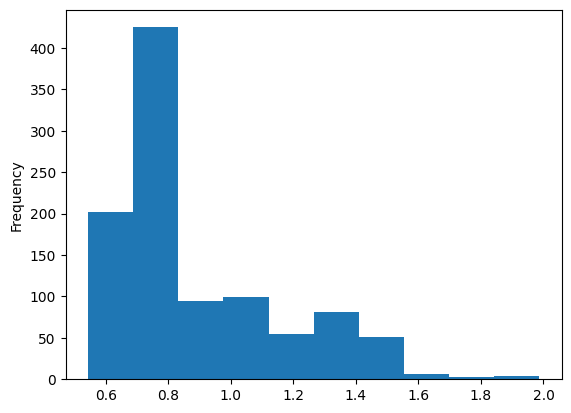

In [44]:
# Histogram plot of the aspect ratios
train_df['aspect_ratio'].plot(kind='hist')

## 7. What is the average size (in KB or MB) of the images?

In [51]:
# Calculate the size of each image in bytes
train_df['image_size_bytes'] = train_df['image'].apply(lambda img: img.nbytes)
train_df['image_size_bytes'].head()

,image_size_bytes
0,1000500
1,999000
2,1005000
3,757500
4,1008000


In [52]:
# Calculate the average size in kilobytes
average_size_kb = train_df['image_size_bytes'].mean() / 1024
average_size_kb

970.1289522058823

In [50]:
# Print the result
print(f"Average image size: {average_size_kb:.2f} KB")

Average image size: 970.13 KB


## 8. Are there any duplicate images in the dataset?

In [56]:
help(train_df.duplicated)

Help on method duplicated in module pandas.core.frame:

duplicated(subset: 'Hashable | Sequence[Hashable] | None' = None, keep: 'DropKeep' = 'first') -> 'Series' method of tensorflow_datasets.core.as_dataframe.StyledDataFrame instance
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series
        Boolean series for each duplicated rows.
    
    See Also
    --------
    Index.dupli

In [57]:
# filter df by the ones which are duplicate (2nd occurence of same thing)
train_df[train_df.duplicated(subset='image', keep=False)]

,image,label,shape,aspect_ratio,image_size_bytes


In [ ]:
# no dups

## CV and PIL

Questions 9-14 can be best done with image manipulation packages

In [58]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [60]:
train_df.dtypes

,0
image,object
label,int64
shape,object
aspect_ratio,float64
image_size_bytes,int64


## 9. Are there any corrupted or unreadable image files?

In [69]:
def is_image_valid(image_array):
    try:
        Image.fromarray(image_array)
        return True
    except Exception:
        return False

invalid_images_indices = train_df[train_df['image'].apply(
    lambda img: not is_image_valid(img)
    )].index


print(f"Number of invalid images: {len(invalid_images_indices)}")

Number of invalid images: 0


## 10. What is the average brightness, contrast, and sharpness of the images?

In [63]:
def calculate_image_stats(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate brightness (mean pixel value)
    brightness = np.mean(gray)

    # Calculate contrast (standard deviation of pixel values)
    contrast = np.std(gray)

    # Calculate sharpness using Laplacian variance
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sharpness = np.var(laplacian)

    return brightness, contrast, sharpness

# Calculate stats for all images and get averages
brightness_values = []
contrast_values = []
sharpness_values = []

for image in train_df["image"]:
    b, c, s = calculate_image_stats(image)
    brightness_values.append(b)
    contrast_values.append(c)
    sharpness_values.append(s)

avg_brightness = np.mean(brightness_values)
avg_contrast = np.mean(contrast_values)
avg_sharpness = np.mean(sharpness_values)

print(f"Average Brightness: {avg_brightness:.2f}")
print(f"Average Contrast: {avg_contrast:.2f}")
print(f"Average Sharpness: {avg_sharpness:.2f}")

Average Brightness: 91.88
Average Contrast: 52.60
Average Sharpness: 243.24


## 11. Can you visualize the pixel intensity distribution (histogram) for a few sample images?

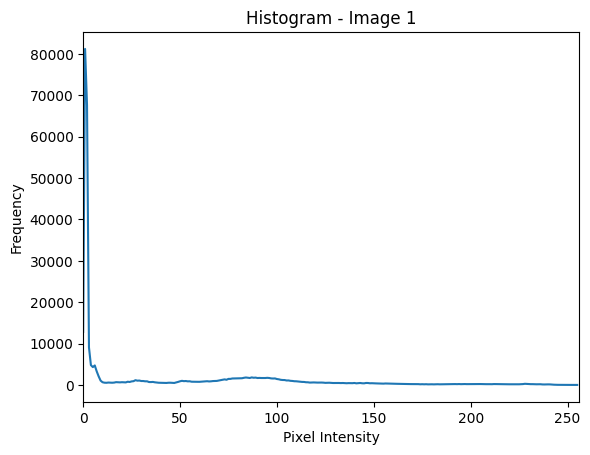

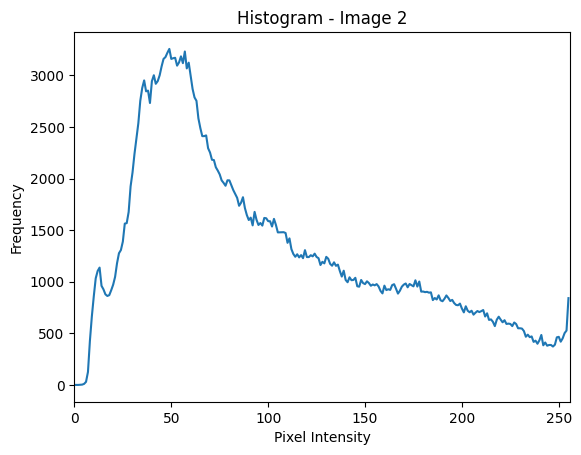

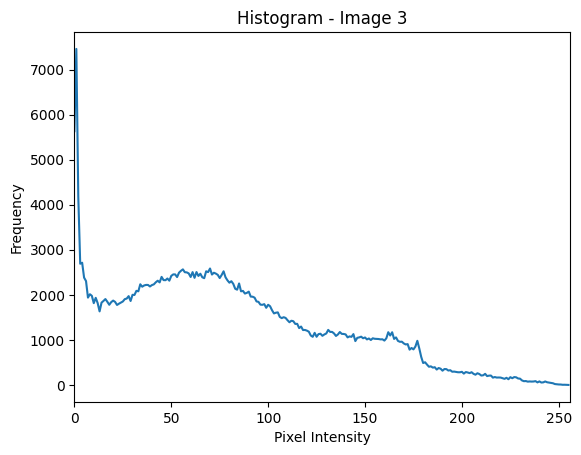

In [64]:
def plot_histogram(image, title):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # Plot histogram
    plt.figure()
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

# Tryin g for 3 images
for i in range(3):
    plot_histogram(train_df["image"][i], f"Histogram - Image {i + 1}")

## 12. What do the images look like when downsampled (e.g., to 32x32 pixels)?

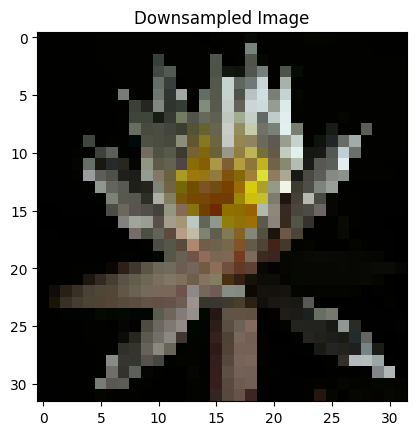

In [65]:
def downsample_image(image, size=(32, 32)):
    resized_image = cv2.resize(image, size)
    return resized_image

downsampled_image = downsample_image(train_df["image"][0])
plt.imshow(downsampled_image)
plt.title("Downsampled Image")
plt.show()

## 13. create a collage showing random samples from different classes?

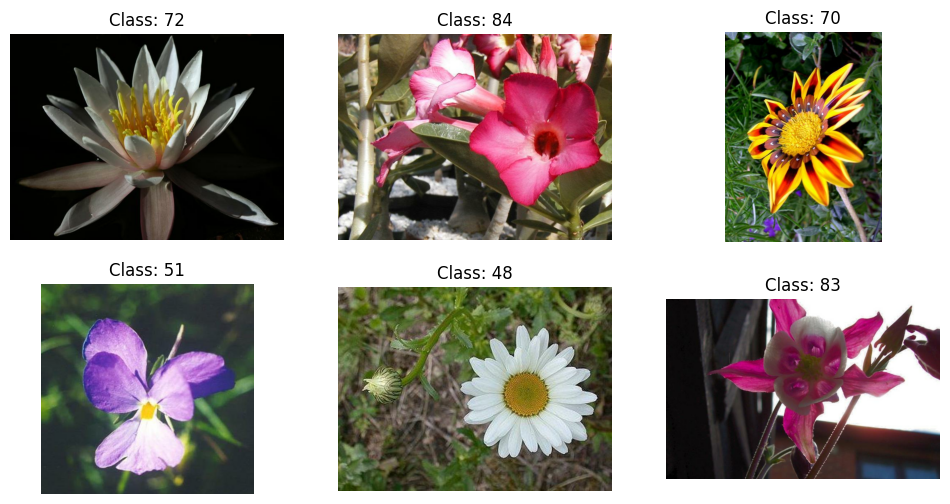

In [79]:
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_df['image'][i].astype("uint8"))  # Convert to NumPy array for display
    plt.title(f"Class: {train_df['label'][i]}")
    plt.axis('off')
plt.show()

## 14. Perform augmentation (rotation, flipping, zoom)

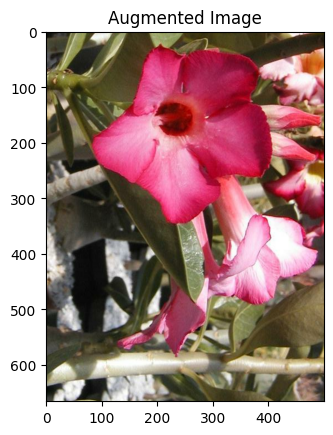

In [78]:
import albumentations as A

def augment_image(image):
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ])
    augmented_image = transform(image=image)['image']
    return augmented_image

augmented_image = augment_image(train_df["image"][1])
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.show()

In [ ]:
# Thank you!